In [503]:
import pandas as pd
import numpy as np

In [504]:
df = pd.read_csv('LBW_Dataset.csv')

In [505]:
df.shape

(96, 10)

In [506]:
stat_details = df.describe()

In [507]:
stat_details

,Community,Age,Weight,Delivery phase,HB,IFA,BP,Education,Residence,Result
count,96.000000,89.000000,85.000000,92.000000,77.000000,96.000000,81.000000,93.0,94.000000,96.000000
mean,2.177083,23.752809,45.129412,1.021739,9.076623,0.687500,1.725189,5.0,1.138298,0.750000
std,1.213909,3.321011,8.215532,0.146630,0.788052,0.465946,1.449447,0.0,0.347063,0.435286
min,1.000000,17.000000,30.000000,1.000000,5.900000,0.000000,1.200000,5.0,1.000000,0.000000
25%,1.000000,21.000000,40.000000,1.000000,8.900000,0.000000,1.375000,5.0,1.000000,0.750000
50%,2.500000,24.000000,43.000000,1.000000,9.000000,1.000000,1.500000,5.0,1.000000,1.000000
75%,3.000000,26.000000,50.000000,1.000000,9.200000,1.000000,1.661538,5.0,1.000000,1.000000
max,4.000000,38.000000,65.000000,2.000000,11.000000,1.000000,13.875000,5.0,2.000000,1.000000


In [508]:
### Delivery phase and Education features can be imputed with the mode value
df['Delivery phase'].value_counts()

1.0    90
2.0     2
Name: Delivery phase, dtype: int64

In [509]:
df['Delivery phase'].fillna(1.0, inplace = True)

In [510]:
df['Education'].value_counts()

5.0    93
Name: Education, dtype: int64

In [511]:
df['Education'].fillna(5.0, inplace = True)

In [512]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Weight'].fillna(df['Weight'].mean(), inplace = True)

In [513]:
import matplotlib.pyplot as plt

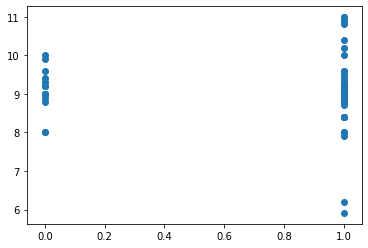

In [514]:
plt.scatter(df['Result'],df['HB'])

**Shows that the result class with 1 as label has wide range of HB values**

In [515]:
grouped_df = df.groupby(df['Result'])

In [516]:
grouped_df['HB'].median()

Result
0    9.1
1    9.0
Name: HB, dtype: float64

**Mean and median values show no much difference, could consider this wide range in graph while imputing**

In [517]:
df['HB'].fillna(df['HB'].mean(), inplace = True)

In [518]:
BP_mean = grouped_df['BP'].mean()

In [519]:
BP_mean

Result
0    1.775443
1    1.711841
Name: BP, dtype: float64

In [520]:
filt_1 = ((df['Result'] == 0) & (df['BP'].isnull()))
filt_2 = ((df['Result'] == 1) & (df['BP'].isnull()))
df.loc[filt_1, 'BP'] = BP_mean[0]
df.loc[filt_2, 'BP'] = BP_mean[1]

In [521]:
df['Residence'].value_counts()

1.0    81
2.0    13
Name: Residence, dtype: int64

In [522]:
df['Residence'].fillna(1, inplace = True)

In [523]:
df.describe()

,Community,Age,Weight,Delivery phase,HB,IFA,BP,Education,Residence,Result
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0,96.000000,96.000000
mean,2.177083,23.752809,45.129412,1.020833,9.076623,0.687500,1.727741,5.0,1.135417,0.750000
std,1.213909,3.196317,7.725267,0.143576,0.704855,0.465946,1.330177,0.0,0.343964,0.435286
min,1.000000,17.000000,30.000000,1.000000,5.900000,0.000000,1.200000,5.0,1.000000,0.000000
25%,1.000000,21.000000,40.000000,1.000000,9.000000,0.000000,1.375000,5.0,1.000000,0.750000
50%,2.500000,24.000000,45.000000,1.000000,9.076623,1.000000,1.571429,5.0,1.000000,1.000000
75%,3.000000,25.250000,49.250000,1.000000,9.200000,1.000000,1.711841,5.0,1.000000,1.000000
max,4.000000,38.000000,65.000000,2.000000,11.000000,1.000000,13.875000,5.0,2.000000,1.000000


In [524]:
df.to_csv('cleaned_LBW_Dataset.csv')

In [560]:
X_train_sample = df.sample(int(.7*len(df)))
X_test_sample = df.sample(int(0.3*len(df)))
columns = ['Community','Age','Weight','Delivery phase','HB','IFA','BP','Education','Residence']
X_train = X_train_sample[columns]
Y_train = X_train_sample['Result']
X_test = X_test_sample[columns]
X_test = np.array(X_test)
Z = np.zeros((len(Y_train),2))
t = 0
for i in Y_train.index:
    Z[t,Y_train[i]] = 1
    t+=1
X_train = np.array(X_train)

In [561]:
wi_1 = np.random.randn(15,9)
bi_1 = [1 for i in range(15)]
wi_2 = np.random.randn(15,2)
bi_2 = [1 for i in range(2)]

In [562]:
def forward_prop(X,wi_1,bi_1,wi_2,bi_2):
    #first layer 
    M1 = 1/(1+np.exp(-(X.dot(wi_1.T)+bi_1)))
    #second layer
    A1 = M1.dot(wi_2)+bi_2 
    expA = np.exp(A1)
    Y = expA/expA.sum(axis=1,keepdims=True)
    return Y,M1

In [563]:
forward_prop(X_test,wi_1,bi_1,wi_2,bi_2)

(array([[0.02505499, 0.97494501],
        [0.03080468, 0.96919532],
        [0.02151902, 0.97848098],
        [0.02167248, 0.97832752],
        [0.03132586, 0.96867414],
        [0.03185619, 0.96814381],
        [0.02147045, 0.97852955],
        [0.02552213, 0.97447787],
        [0.02145781, 0.97854219],
        [0.02195098, 0.97804902],
        [0.03155569, 0.96844431],
        [0.02151051, 0.97848949],
        [0.02793949, 0.97206051],
        [0.02338675, 0.97661325],
        [0.03149015, 0.96850985],
        [0.02162891, 0.97837109],
        [0.02143447, 0.97856553],
        [0.02497428, 0.97502572],
        [0.02166548, 0.97833452],
        [0.02145717, 0.97854283],
        [0.02922964, 0.97077036],
        [0.02199752, 0.97800248],
        [0.03194522, 0.96805478],
        [0.02905039, 0.97094961],
        [0.02407542, 0.97592458],
        [0.03187408, 0.96812592],
        [0.02385132, 0.97614868],
        [0.02651607, 0.97348393]]),
 array([[1.00000000e+00, 1.00000000e+00, 8.241

In [564]:
def diff_wi_2(H,Z,Y):
    return H.T.dot(Z-Y)

def diff_wi_1(X,H,Z,output,wi_2):
    dz = (Z-output).dot(wi_2.T)*H*(1-H)
    return X.T.dot(dz)

In [565]:
def diff_B2(Z,Y):
    return (Z-Y).sum(axis=0)

def diff_B1(Z,Y,wi_2,H):
    return ((Z-Y).dot(wi_2.T)*H*(1-H)).sum(axis=0)

In [566]:
learning_rate = 1e-4
for epoch in range(10000):
    output,hidden = forward_prop(X_train,wi_1,bi_1,wi_2,bi_2)
    wi_2+=learning_rate*diff_wi_2(hidden,Z,output)
    bi_2+=learning_rate*diff_B2(Z,output)
    wi_1+=learning_rate*diff_wi_1(X_train,hidden,Z,output,wi_2).T
    bi_1+=learning_rate*diff_B1(Z,output,wi_2,hidden)
    

In [569]:
data = df.copy()
data = np.array(data)
xtest = data[38][:9]
xtest
hidden_output = 1/(1+np.exp(-(xtest.dot(wi_1.T))-bi_1))
output_layer_output = hidden_output.dot(wi_2)+bi_2 
expA = np.exp(output_layer_output)
Y = expA/expA.sum()
Y
#print("Probability of class 0>>>{}\n Probability of class 1>>>{} ".format(Y[0],Y[1]))

array([0.23880313, 0.76119687])